In [1]:
import pandas as pd
import pymysql.cursors
import matplotlib.pyplot as plt 


In [2]:
def get_all_category_location_analysis():
    ## location_List
    location_list = ["新竹縣", "苗栗縣", "彰化縣", "南投縣", "雲林縣", "嘉義縣", "屏東縣", "宜蘭縣", "花蓮縣", "臺東縣", "澎湖縣", "金門縣", "連江縣", "基隆市",
                     "新竹市", "嘉義市", "臺北市", "新北市", "桃園市", "臺中市", "臺南市", "高雄市", "台北市", "台中市", "台東縣", "台南市"]

    location_count_list = []
    # Connect to the database
    connection = pymysql.connect(host='localhost',
                                 user='testadmin',
                                 password='testadmin',
                                 database='test',
                                 cursorclass=pymysql.cursors.DictCursor)

    with connection:

        with connection.cursor() as cursor:
            for location in location_list:
                sql = "SELECT   count(DISTINCT uid) as amount  FROM `event_info` WHERE location like %s "
                cursor.execute(sql, ("%" + location + "%",))
                result = cursor.fetchone()
                count = result['amount']
                new_list = []
                new_list.append(location)
                new_list.append(count)
                location_count_list.append(new_list)
    total = 0
    for list_index in location_count_list:
        for i in list_index:
            if (type(i) == int):
                total = total + i
    print(total)
    ##  藝文活動場次 比率
    df = pd.DataFrame(location_count_list, columns=['location', 'count'])

    ## 簡繁體 轉換
    df = df.set_index('location')

    name_change_list = ["台北市", "台中市", "台東縣", "台南市"]
    for orign_name in name_change_list:
        transform_name = orign_name.replace("台", "臺")
        df.loc[transform_name]['count'] = df.loc[transform_name]['count'] + df.loc[orign_name]['count']
        df = df.drop(index=orign_name)

        ## 比率
    df['ratio'] = df['count'] / total
    display(df.sort_values(by=['ratio'], ascending=False))

    ## 比率圖
    df = df[df['count'] > 0]
    plt.figure(figsize=(16, 9))  # 顯示圖框架大小

    labels = df.index  # 製作圓餅圖的類別標籤
    size = df["ratio"]  # 製作圓餅圖的數值來源
    plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

    plt.pie(size,  # 數值
            labels=labels,  # 標籤
            autopct="%1.1f%%",  # 將數值百分比並留到小數點一位
            pctdistance=0.6,  # 數字距圓心的距離
            textprops={"fontsize": 20},  # 文字大小
            shadow=True)  # 設定陰影

    plt.axis('equal')  # 使圓餅圖比例相等
    plt.title("藝文活動縣市占比", {"fontsize": 35}, loc='left')  # 設定標題及其文字大小
    plt.legend(loc="best")  # 設定圖例及其位置為最佳

    plt.savefig("藝文活動縣市占比.jpg",  # 儲存圖檔
                bbox_inches='tight',  # 去除座標軸占用的空間
                pad_inches=0.0)  # 去除所有白邊
    # plt.close()


3912


,count,ratio
location,,
臺北市,706,0.180470
高雄市,564,0.144172
臺中市,558,0.142638
桃園市,504,0.128834
臺南市,356,0.091002
新北市,333,0.085123
彰化縣,199,0.050869
南投縣,160,0.040900
苗栗縣,148,0.037832


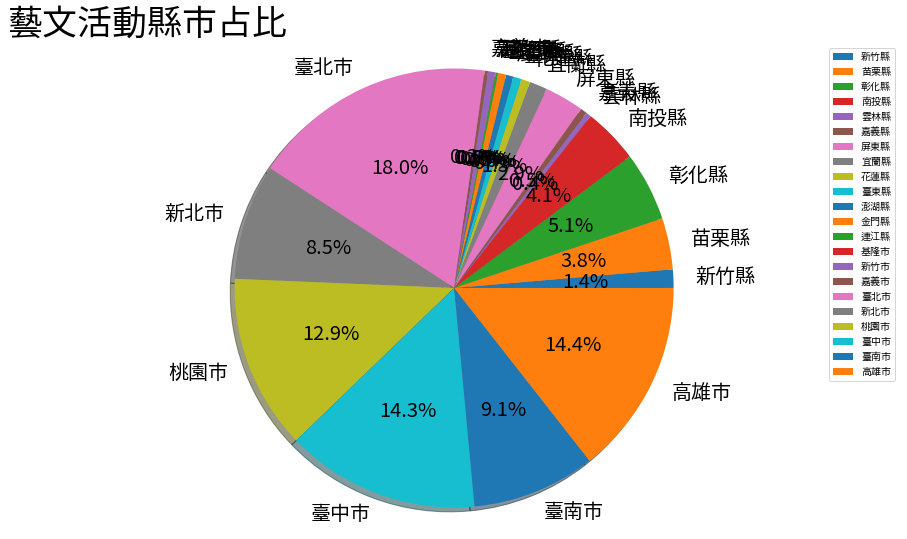

In [3]:
get_all_category_location_analysis()

In [4]:
def get_location_category_analysis(category):
    ## location_List
    location_list = ["新竹縣", "苗栗縣", "彰化縣", "南投縣", "雲林縣", "嘉義縣", "屏東縣", "宜蘭縣", "花蓮縣", "臺東縣", "澎湖縣", "金門縣", "連江縣", "基隆市",
                     "新竹市", "嘉義市", "臺北市", "新北市", "桃園市", "臺中市", "臺南市", "高雄市", "台北市", "台中市", "台東縣", "台南市"]

    location_count_list = []
    # Connect to the database
    connection = pymysql.connect(host='localhost',
                                 user='testadmin',
                                 password='testadmin',
                                 database='test',
                                 cursorclass=pymysql.cursors.DictCursor)

    with connection:

        with connection.cursor() as cursor:
            for location in location_list:
                sql = "SELECT   count(DISTINCT uid) as amount  FROM `event_info` WHERE location like %s and category_name =%s"
                cursor.execute(sql, ("%" + location + "%", category))
                result = cursor.fetchone()
                count = result['amount']
                new_list = []
                new_list.append(location)
                new_list.append(count)
                location_count_list.append(new_list)
                ## count total
    total = 0
    for list_index in location_count_list:
        for i in list_index:
            if (type(i) == int):
                total = total + i
    print(total)

    ## 今年度 藝文活動場次 比率
    df = pd.DataFrame(location_count_list, columns=['location', 'count'])

    ## 簡繁體 轉換
    df = df.set_index('location')
    name_change_list = ["台北市", "台中市", "台東縣", "台南市"]
    for orign_name in name_change_list:
        transform_name = orign_name.replace("台", "臺")
        df.loc[transform_name]['count'] = df.loc[transform_name]['count'] + df.loc[orign_name]['count']
        df = df.drop(index=orign_name)
    df['ratio'] = df['count'] / total
    display(df.sort_values(by=['ratio'], ascending=False))

    ## 比率圖
    df = df[df['count'] > 0]
    plt.figure(figsize=(16, 9))  # 顯示圖框架大小

    labels = df.index  # 製作圓餅圖的類別標籤
    size = df["ratio"]  # 製作圓餅圖的數值來源
    plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

    plt.pie(size,  # 數值
            labels=labels,  # 標籤
            autopct="%1.1f%%",  # 將數值百分比並留到小數點一位
            pctdistance=0.6,  # 數字距圓心的距離
            textprops={"fontsize": 20},  # 文字大小
            shadow=True)  # 設定陰影

    plt.axis('equal')  # 使圓餅圖比例相等
    plt.title("藝文活動縣市占比" + "(" + category + ")", {"fontsize": 35}, loc='left')  # 設定標題及其文字大小
    plt.legend(loc="best")  # 設定圖例及其位置為最佳

    plt.savefig("藝文活動縣市占比" + "(" + category + ").jpg",  # 儲存圖檔
                bbox_inches='tight',  # 去除座標軸占用的空間
                pad_inches=0.0)  # 去除所有白邊
    # plt.close()


384


,count,ratio
location,,
臺北市,95,0.247396
高雄市,64,0.166667
臺中市,64,0.166667
臺南市,33,0.085938
桃園市,28,0.072917
苗栗縣,24,0.062500
新竹市,13,0.033854
南投縣,12,0.031250
屏東縣,9,0.023438


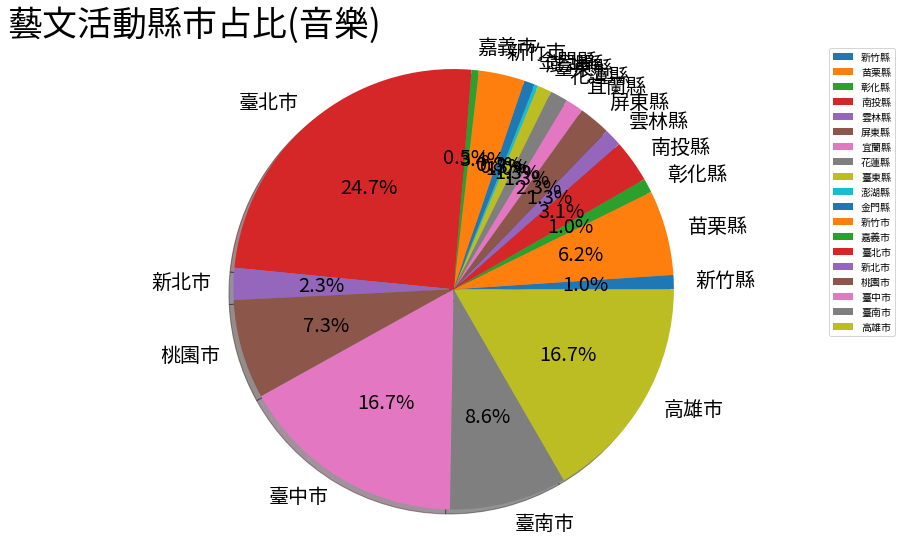

In [5]:
get_location_category_analysis("音樂")

38


,count,ratio
location,,
臺北市,22,0.578947
高雄市,6,0.157895
臺中市,5,0.131579
新北市,3,0.078947
屏東縣,1,0.026316
宜蘭縣,1,0.026316
連江縣,0,0.000000
臺南市,0,0.000000
桃園市,0,0.000000


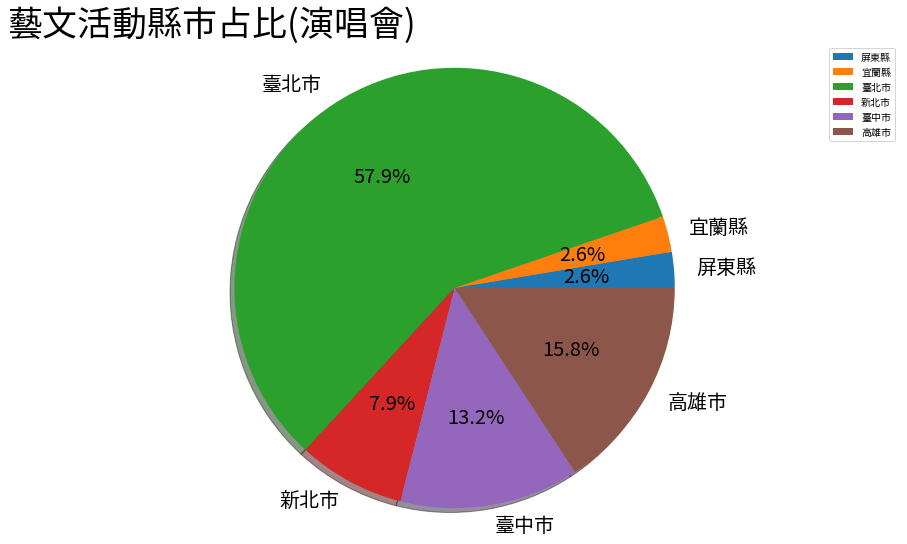

In [6]:
get_location_category_analysis("演唱會")